# Transfer Leaning

> We will be using the food-101 dataset from kaggle. It has 101 food labels.


**Dataset(Link)** -> https://www.kaggle.com/datasets/dansbecker/food-101


In [1]:
!nvidia-smi

Mon Jul 25 07:49:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref=zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

--2022-07-25 07:49:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   215MB/s    in 0.7s    

2022-07-25 07:49:02 (215 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [3]:
import os

# Find the number of files

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories, {len(filenames)} images in '{dirpath}'. ")

There are 2 directories, 0 images in '10_food_classes_10_percent'. 
There are 10 directories, 0 images in '10_food_classes_10_percent/train'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/ice_cream'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/sushi'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/hamburger'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/ramen'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/chicken_curry'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/steak'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/pizza'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/chicken_wings'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/fried_rice'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/grilled_salmon'. 
There are

## Visualizing the images

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline
import random

def view_random_image(target_dir,target_class):

  """
    target_dir and target_class are in string format.
  """

  # Target directory to view images
  target_folder= target_dir + target_class

  # Random Image path
  random_image= random.sample(os.listdir(target_folder),1)

  # print(random_image)

  # Plotting and reading the images
  img= mping.imread(target_folder + "/"  + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  # print(f"Image shape: {img.shape}") # Shape of the image

  return img



array([[[179, 157,  84],
        [175, 152,  82],
        [177, 156,  89],
        ...,
        [ 23,  17,  31],
        [ 29,  21,  34],
        [ 36,  28,  39]],

       [[183, 163,  92],
        [187, 167,  98],
        [195, 176, 110],
        ...,
        [ 28,  22,  36],
        [ 33,  25,  38],
        [ 39,  29,  40]],

       [[184, 167,  98],
        [180, 162,  96],
        [179, 161,  97],
        ...,
        [ 31,  25,  39],
        [ 35,  27,  38],
        [ 36,  26,  37]],

       ...,

       [[ 32,  22,  47],
        [ 23,  13,  38],
        [ 16,   6,  31],
        ...,
        [ 19,  11,  32],
        [ 17,   8,  29],
        [ 19,   9,  33]],

       [[ 29,  19,  46],
        [ 22,  12,  39],
        [ 19,   9,  36],
        ...,
        [ 21,  13,  34],
        [ 20,  10,  34],
        [ 17,   7,  31]],

       [[ 20,   9,  39],
        [ 15,   4,  34],
        [ 15,   4,  34],
        ...,
        [ 25,  16,  37],
        [ 22,  12,  36],
        [ 13,   3,  27]]

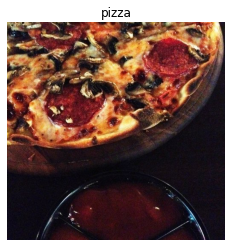

In [5]:
view_random_image('/content/10_food_classes_10_percent/train/', target_class='pizza')

## Creating the data

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SHAPE=(224,224)
BATCH_SIZE=32

train_dir='/content/10_food_classes_10_percent/train'
test_dir='/content/10_food_classes_10_percent/test'


train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)


train_data= train_datagen.flow_from_directory(train_dir, target_size=IMG_SHAPE, batch_size=BATCH_SIZE, class_mode="categorical")

test_data= test_datagen.flow_from_directory(test_dir, target_size=IMG_SHAPE, batch_size=BATCH_SIZE, class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Setting up callbacks

> There are the things that are running while the model is training on the training datasets.

> There are extra functionality that we can add to the models to be performed during or after training.

Examples:

* Tensorboard callback
* ModelCheckpoint callback
* EarlyStopping callback

### Tensorboard

In [2]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir= dir_name + "/" + experiment_name + "/" + datetime.datetime.utcnow().strftime("%Y%m%d")
  tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving Tensorboard log files to: {log_dir}")
  return tensorboard_callback

## Tensorflow Hub

**Link** -> https://tfhub.dev/

> Found model from tensorflow hub which we can use in our use case.

**Link For efficientnet/b0/feature-vector** -> https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

**Link for imagenet/resnet_v2_50/feature_vector** -> https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5

### Model URLS from tensorflow Hub

In [23]:
efficientnet_url='https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'
resnet_url= 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

### Dependencies needed

In [12]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

### Creating a model

In [24]:
IMG_SHAPE

(224, 224)

In [25]:
IMG_SHAPE+(3,)

(224, 224, 3)

In [3]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMG_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

## Trying the Imagenet/resnet model from Tensorflow Hub

In [26]:
train_data.num_classes

10

In [27]:
resnet_model=create_model(resnet_url, num_classes=train_data.num_classes)

In [28]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


### Fitting the Resnet Model

> We are only using 10% of the data with only 10 labels.

In [29]:
resnet_model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam())

tensorboardCallback= create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="resnet_50_v2")

resnet_history=resnet_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data), callbacks=[tensorboardCallback] ,validation_data=test_data, validation_steps=len(test_data))

Saving Tensorboard log files to: tensorflow_hub/resnet_50_v2/20220725
Epoch 1/10
24/24 [==============================] - 24s 786ms/step - loss: 2.0572 - accuracy: 0.3200 - val_loss: 1.2234 - val_accuracy: 0.6096
Epoch 2/10
24/24 [==============================] - 17s 715ms/step - loss: 0.9719 - accuracy: 0.6933 - val_loss: 0.8804 - val_accuracy: 0.7188
Epoch 3/10
24/24 [==============================] - 17s 709ms/step - loss: 0.6623 - accuracy: 0.8160 - val_loss: 0.7450 - val_accuracy: 0.7528
Epoch 4/10
24/24 [==============================] - 17s 711ms/step - loss: 0.5140 - accuracy: 0.8667 - val_loss: 0.7146 - val_accuracy: 0.7620
Epoch 5/10
24/24 [==============================] - 17s 710ms/step - loss: 0.4131 - accuracy: 0.9000 - val_loss: 0.6682 - val_accuracy: 0.7776
Epoch 6/10
24/24 [==============================] - 17s 711ms/step - loss: 0.3490 - accuracy: 0.9240 - val_loss: 0.6590 - val_accuracy: 0.7820
Epoch 7/10
24/24 [==============================] - 17s 708ms/step - los

In [30]:
resnet_model.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 0.6245 - accuracy: 0.7940


[0.6244770288467407, 0.7940000295639038]

### Conclusion

> The resnet model we choose from tensorflow hub has an accuracy of ~ 79% which is almost double the accuracy score we had when we build a CNN model(~42%) from scratch. This is the power of transfer learning. We only used 10% of the dataset from the dataset we had when we build a CNN model from scratch.

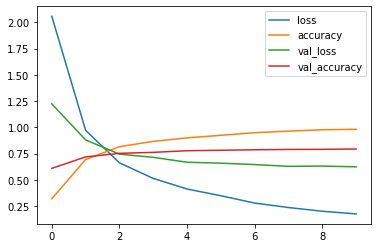

In [31]:
import pandas as pd

pd.DataFrame(resnet_history.history).plot()

### Plot and Lost Curve

In [4]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

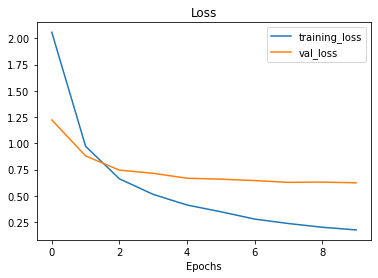

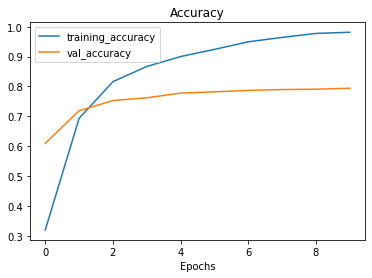

In [32]:
plot_loss_curves(resnet_history)

## Trying the efficientnet_b0 model from Tensorflow Hub

**Resource** -> https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html

In [33]:
effecientnet_model= create_model(efficientnet_url, num_classes=train_data.num_classes)

In [34]:
effecientnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [35]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [36]:
effecientnet_model.compile(metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy")

tensorboardCallback= create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="effecientnet_model_b0")

effecientnet_history=effecientnet_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data), callbacks=[tensorboardCallback] ,validation_data=test_data, validation_steps=len(test_data))

Saving Tensorboard log files to: tensorflow_hub/effecientnet_model_b0/20220725
Epoch 1/10
24/24 [==============================] - 28s 744ms/step - loss: 1.7846 - accuracy: 0.4707 - val_loss: 1.2516 - val_accuracy: 0.7484
Epoch 2/10
24/24 [==============================] - 16s 677ms/step - loss: 1.0311 - accuracy: 0.7867 - val_loss: 0.8499 - val_accuracy: 0.8208
Epoch 3/10
24/24 [==============================] - 16s 679ms/step - loss: 0.7472 - accuracy: 0.8347 - val_loss: 0.6856 - val_accuracy: 0.8504
Epoch 4/10
24/24 [==============================] - 16s 681ms/step - loss: 0.6014 - accuracy: 0.8760 - val_loss: 0.6036 - val_accuracy: 0.8576
Epoch 5/10
24/24 [==============================] - 16s 675ms/step - loss: 0.5100 - accuracy: 0.8907 - val_loss: 0.5522 - val_accuracy: 0.8664
Epoch 6/10
24/24 [==============================] - 16s 675ms/step - loss: 0.4449 - accuracy: 0.9053 - val_loss: 0.5156 - val_accuracy: 0.8744
Epoch 7/10
24/24 [==============================] - 16s 674ms/s

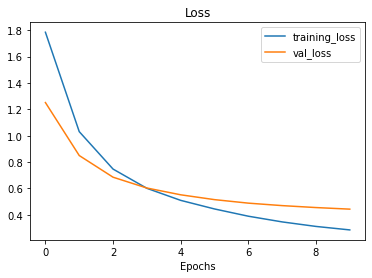

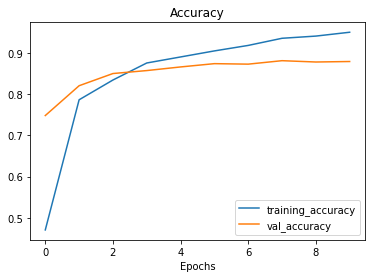

In [37]:
plot_loss_curves(effecientnet_history)

In [38]:
resnet_model.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 0.6245 - accuracy: 0.7940


[0.6244768500328064, 0.7940000295639038]

In [39]:
effecientnet_model.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 0.4435 - accuracy: 0.8796


[0.44346219301223755, 0.8795999884605408]

## Conclusion

> The *effecientnet_model* has an higher accuracy of ~ 87.6% and the *resnet_model* had an accuracy of ~ 79.47% on the same training data, test data, and the number of epochs. 

## Trying a better/updated verion of efficientnet/b7

> Above we tried the efficientnet/b0 and we got an insane accuracy score of **87.63%**. Let see that the updated model can beat that score or not as an experiment.

**Link(By Tensorflow Team)** -> https://tfhub.dev/tensorflow/efficientnet/b7/fe
ature-vector/1

**Link(By Google Team)** - https://tfhub.dev/google/efficientnet/b7/feature-vector/1

In [6]:
efficientnet_b7_by_tensorflow_url='https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1'
efficientnet_b7_by_google_url='https://tfhub.dev/google/efficientnet/b7/feature-vector/1'

In [5]:
def updated_create_model(model_url, num_classes=10,):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMG_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  model.compile(metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy")

  return model

In [13]:
efficientnet_b7_by_tensorflow_model =updated_create_model(efficientnet_b7_by_tensorflow_url, num_classes=train_data.num_classes)

In [14]:
tensorboardCallback= create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="efficientnet_b7")
effecientnet_b7_by_tensorflow_history=efficientnet_b7_by_tensorflow_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data), callbacks=[tensorboardCallback] ,validation_data=test_data, validation_steps=len(test_data))

Saving Tensorboard log files to: tensorflow_hub/efficientnet_b7/20220725
Epoch 1/10
24/24 [==============================] - 72s 2s/step - loss: 1.5817 - accuracy: 0.5547 - val_loss: 0.9613 - val_accuracy: 0.7820
Epoch 2/10
24/24 [==============================] - 35s 2s/step - loss: 0.7989 - accuracy: 0.8013 - val_loss: 0.6640 - val_accuracy: 0.8368
Epoch 3/10
24/24 [==============================] - 36s 2s/step - loss: 0.5807 - accuracy: 0.8600 - val_loss: 0.5752 - val_accuracy: 0.8496
Epoch 4/10
24/24 [==============================] - 35s 2s/step - loss: 0.4778 - accuracy: 0.8880 - val_loss: 0.5228 - val_accuracy: 0.8572
Epoch 5/10
24/24 [==============================] - 36s 2s/step - loss: 0.4075 - accuracy: 0.9107 - val_loss: 0.4963 - val_accuracy: 0.8604
Epoch 6/10
24/24 [==============================] - 36s 2s/step - loss: 0.3549 - accuracy: 0.9200 - val_loss: 0.4747 - val_accuracy: 0.8624
Epoch 7/10
24/24 [==============================] - 36s 2s/step - loss: 0.3148 - accura

In [15]:
efficientnet_b7_by_tensorflow_model.evaluate(test_data)

79/79 [==============================] - 28s 346ms/step - loss: 0.4363 - accuracy: 0.8684


[0.4362601041793823, 0.868399977684021]

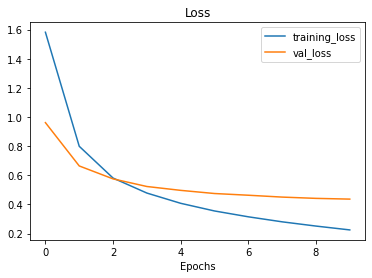

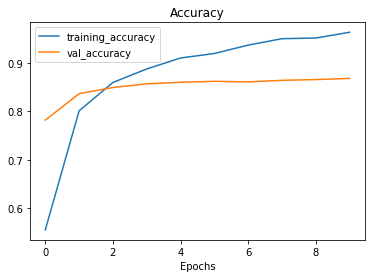

In [16]:
plot_loss_curves(effecientnet_b7_by_tensorflow_history)

In [17]:
efficientnet_b7_by_google_model =updated_create_model(efficientnet_b7_by_google_url, num_classes=train_data.num_classes)

In [18]:

tensorboardCallback= create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="efficientnet_b7")
effecientnet_b7_by_google_history=efficientnet_b7_by_google_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data), callbacks=[tensorboardCallback] ,validation_data=test_data, validation_steps=len(test_data))

Saving Tensorboard log files to: tensorflow_hub/efficientnet_b7/20220725
Epoch 1/10
24/24 [==============================] - 49s 2s/step - loss: 1.5599 - accuracy: 0.5853 - val_loss: 0.9592 - val_accuracy: 0.7924
Epoch 2/10
24/24 [==============================] - 36s 2s/step - loss: 0.7848 - accuracy: 0.8187 - val_loss: 0.6669 - val_accuracy: 0.8328
Epoch 3/10
24/24 [==============================] - 35s 2s/step - loss: 0.5816 - accuracy: 0.8693 - val_loss: 0.5753 - val_accuracy: 0.8484
Epoch 4/10
24/24 [==============================] - 36s 2s/step - loss: 0.4741 - accuracy: 0.8893 - val_loss: 0.5304 - val_accuracy: 0.8552
Epoch 5/10
24/24 [==============================] - 36s 2s/step - loss: 0.4078 - accuracy: 0.9080 - val_loss: 0.5015 - val_accuracy: 0.8556
Epoch 6/10
24/24 [==============================] - 36s 2s/step - loss: 0.3536 - accuracy: 0.9267 - val_loss: 0.4794 - val_accuracy: 0.8604
Epoch 7/10
24/24 [==============================] - 36s 2s/step - loss: 0.3180 - accura

In [19]:
efficientnet_b7_by_google_model.evaluate(test_data)

79/79 [==============================] - 28s 347ms/step - loss: 0.4377 - accuracy: 0.8660


[0.43771880865097046, 0.8659999966621399]

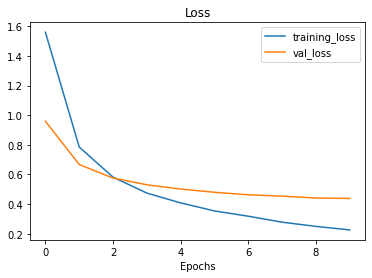

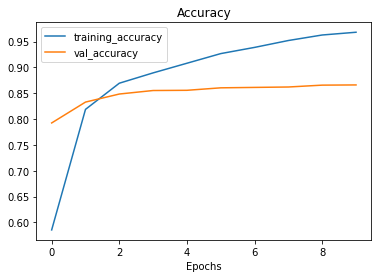

In [20]:
plot_loss_curves(effecientnet_b7_by_google_history)

## Conclusion

> Even though **efficientnet_b7_model** is the newest model made by Tensorflow and the Google Dev Team separately in terms of models, both did ~ 86.84% and ~ 86.60% respectively which is ever so slightly less than the **efficientnet_b0_model** which did around ~ 87.6%.

## Types of Transfer Learning

> "As is" transfer learning is when you take a pretrained model as it is and apply it to your task without any changes.

    For example, many computer vision models are pretrained on the ImageNet dataset which contains 1000 different classes of images. This means passing a single image to this model will produce 1000 different prediction probability values (1 for each class).

    This is helpful if you have 1000 classes of image you'd like to classify and they're all the same as the ImageNet classes, however, it's not helpful if you want to classify only a small subset of classes (such as 10 different kinds of food). Model's with "/classification" in their name on TensorFlow Hub provide this kind of functionality.

> **Feature extraction transfer learning** is when you take the underlying patterns (also called weights) a pretrained model has learned and adjust its outputs to be more suited to your problem.

    For example, say the pretrained model you were using had 236 different layers (EfficientNetB0 has 236 layers), but the top layer outputs 1000 classes because it was pretrained on ImageNet. To adjust this to your own problem, you might remove the original activation layer and replace it with your own but with the right number of output classes. The important part here is that only the top few layers become trainable, the rest remain frozen.
    This way all the underlying patterns remain in the rest of the layers and you can utilise them for your own problem. This kind of transfer learning is very helpful when your data is similar to the data a model has been pretrained on.

> **Fine-tuning transfer learning** is when you take the underlying patterns (also called weights) of a pretrained model and adjust (fine-tune) them to your own problem.